## Welcome to the session
### Know your graphs

## The whole modelling journey can be divided into three major parts
### * **Descriptive Analytics**
### * **Predictive Analytics**
### * Deployment

### Descriptive Analytics 
#### *  Know your data
#### *  fix missing values and outliers
#### *  feature engineering
#### *  Standardise your inputs

###  Predictive Analytics
#### * choosing of algorithm
#### * Cross validation 
#### * Fine Tuning of parameters
####  * Choosing right accuracy metrics


In [1]:
# lets kick off

In [1]:
# MOST COMMONLY USED 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sln

# magic command to see graphs on notebook
%matplotlib inline

C:\Users\HN878SZ\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\HN878SZ\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\HN878SZ\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


###  We will start EDA with beginers famous TITANIC dataset

In [2]:
# load the data
data=pd.read_csv('eda_titanic.csv')
pd.set_option('display.max.columns',999)

In [6]:
## data.head() shows you the initial rows 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
## data.info() shows the object type of these variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
## data.describe() shows you statistics of your data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## Explore yor target first
data['Survived'].value_counts()/data.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### IT's a balanced classifier problem
#### We will cover this in modelling

### What are the types your variable can be???
#### *  continuous variable eg: Age ,Income, Distance
#### *  categorical variable eg: Gender,Country,Branch
#### *  ordinal variable lets discuss this seprately

#####  Ordinal variables are variables which have inherent order in themselves. For eg hot,cold,medium. or topper,mediocore,fail.

### <font color='red'>Our primary motive is always to find the variable which affect the target variable most</font>

In [8]:
# lets start exploring each variable

### Gender

#### countplots gives you the best way to explore categorical data
#### It helps you to see the distribution of each level within a category
#### Lastly you can see affect of category on target after adding hue

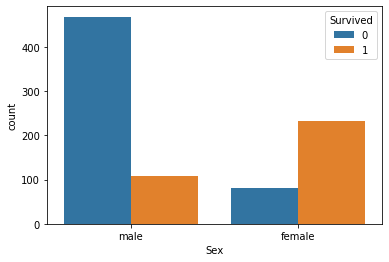

In [10]:
sln.countplot(data['Sex'],hue=data['Survived'])

### Pclass -> Passenger class
### What kind of variable it should be ?? categorical,continuous, ordinal??

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


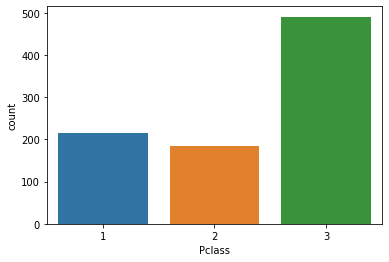

In [12]:
sln.countplot(data['Pclass'])

##### People say Money Can't Buy Everything. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

### Interaction variables 
### what happens if we combine two variables and see the effect on survival
### Lets combine gender and class

C:\Users\HN878SZ\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


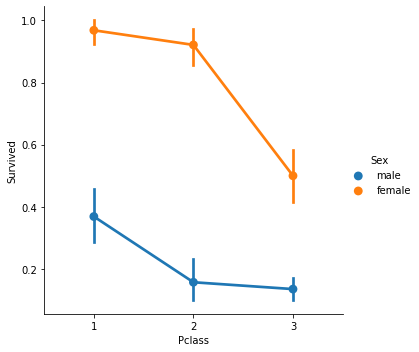

In [13]:
sln.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

## Factor plot gives you a nice combined view of two categorical variables

### Now lets us play with countinuous features
### Age

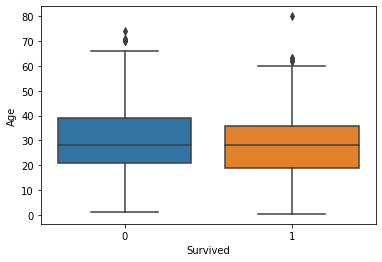

In [14]:
sln.boxplot(data['Survived'],data['Age'])

### A box plot mainly gives you a bivariate analysis ie. If there is a change in mean bewteen different target classes for the continuous variable. It also shows you the spread of Age variable

### The widhth of the box is basical IQR(Inter quartile range)
### Anything which is greater than 1.5*IQR is a outlier(generally not an hard and fast rule)

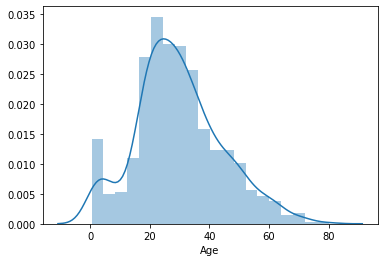

In [16]:
# Alternatively you can use distplots
sln.distplot(data['Age'].dropna())

### Seems like a normal distribution
### What is special about a normal distribution? question for your exercise!!!

### Normal distribution follows central limit therorem.

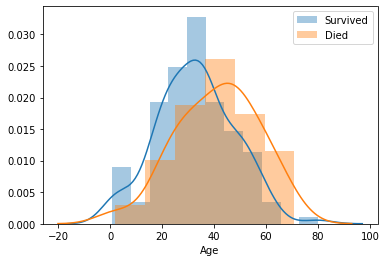

In [25]:
sln.distplot(data[data['Survived']==1].dropna()['Age'],label='Survived')
sln.distplot(data[data['Survived']==0].dropna()['Age'],label='Died')
plt.legend()

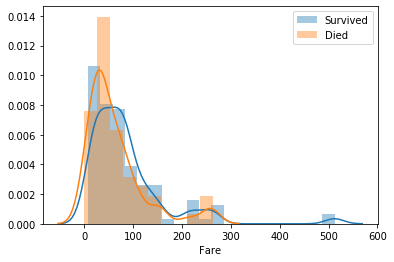

In [22]:
# similarly for fare
sln.distplot(data[data['Survived']==1].dropna()['Fare'],label='Survived')
sln.distplot(data[data['Survived']==0].dropna()['Fare'],label='Died')
plt.legend()

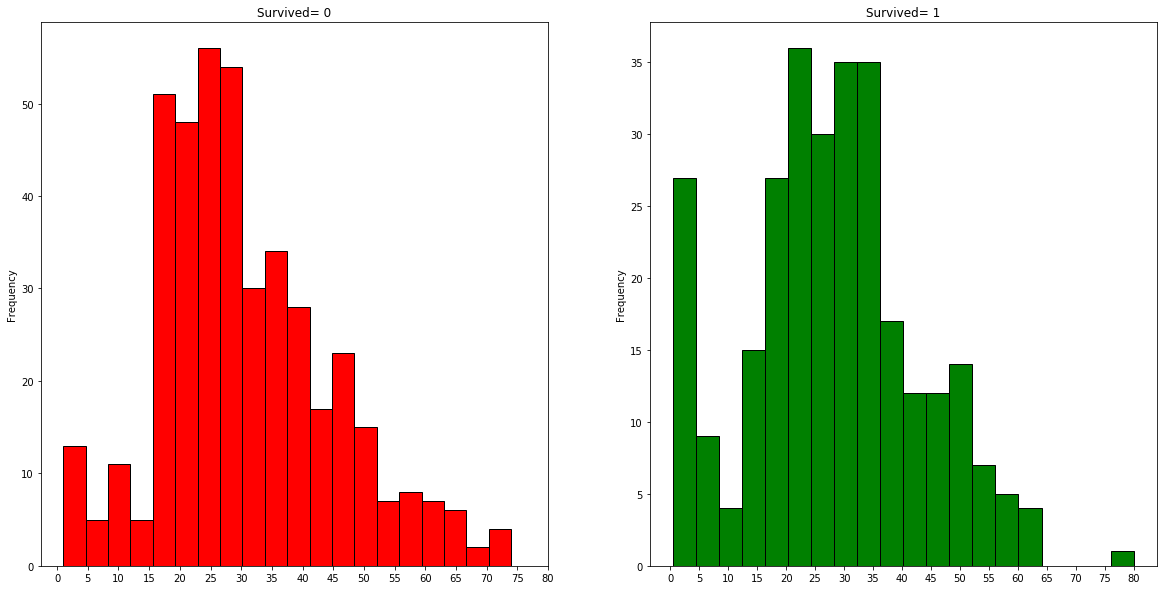

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### These are histograms. Basically it shows frequency of each value.

### What can you make out from these two graphs?

In [26]:
### The chances of babies surviving was high

#### END

## Session 2 Begins !!!

### This part will cover fixing null, outliers, and scaling of variables

### 1) Fixing missing values

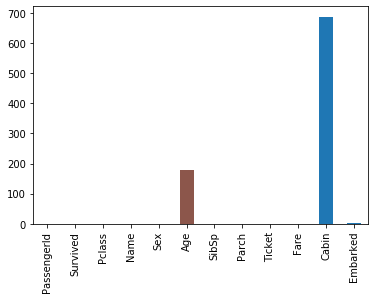

In [9]:
# lets check the null counts
data.isnull().sum().plot(kind='bar')

In [11]:
data.isnull().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## We see Age has 19% of the null values and Cabin has 77% of the null values

### Now generally not a rule
### My observations through many competitions people drop columns having more than 70% of null values
### so we drop Cabin

### Now for age we have couple of options!!
### * drop null values ## BE VERY CAREFUL FOR THIS YOU MAY LOOSE DATA POINTS##
#### * fill null values with mean or median for continuous variables
#### * fill null values with mode for categorical variables
#### Advanced Imputation like KNN

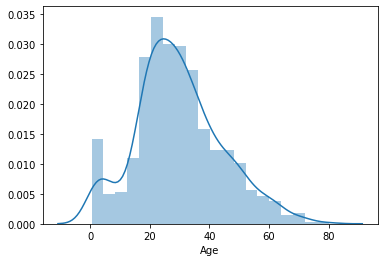

In [13]:
## lets check distribution of age
sln.distplot(data['Age'].dropna())

#### looks like normal we can fill with mean
#### Otherwise its a good idea to treat outliers first and then fill up missing values

### A cool trick which sometimes work with both outliers and null values.
###  null values or outliers have may have  some hidden information or maybe pointing out to an anamoly so we fill them with -99999 or any big negative number so our ml model knows these are somewhat different

### Also there are some models which can handle themselves eg: Xgboost

### What does outliers mean for continuous and categorical

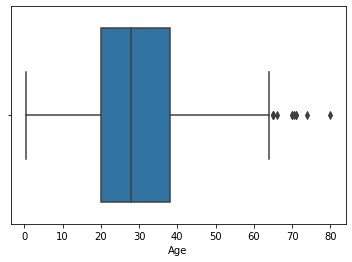

In [14]:
sln.boxplot(data['Age'])

In [15]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### challenge !!! you create a new column names is_outlier for continuous variable using 1.5 quartile rule!!

### Why do we need scaling

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### To make all the variables on the same scale

In [17]:
# we can use ,Ro
from sklearn.preprocessing import StandardScaler,RobustScalerscaler

In [18]:
sc=StandardScaler()

### We only fit_tansform on train data
### We always use transform on test data
#### scaled=sc.fit_transform(train_Data)
#### scaled=sc.transform(test_data/val_data)

#### IMP point to note is for tree based algorithms scaling may not be required because it works on splittling nodes but for regression algorithms and genrally scaling improves results

### difference between iloc and loc

In [5]:
data.iloc[0:10,3:5]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [6]:
data.loc[(data.Age >= 20),['Name','Parch']]

,Name,Parch
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,"Heikkinen, Miss. Laina",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,"Allen, Mr. William Henry",0
6,"McCarthy, Mr. Timothy J",0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2
11,"Bonnell, Miss. Elizabeth",0
12,"Saundercock, Mr. William Henry",0
13,"Andersson, Mr. Anders Johan",5


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
